In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
def plot_histogram(text, bins=50, w=4, h=2):
    
    print(text['title'], text['year'])
    
    plt.figure(figsize=(w,h))
    
    n, bins, _ = plt.hist(text['offsets'], bins)
    plt.show()
    
    print(n, bins, patches)

In [40]:
from lint_analysis.token_offsets import Dataset

ds = Dataset.from_local('a.json')

texts = ds.texts()

Saratoga trunk 1941


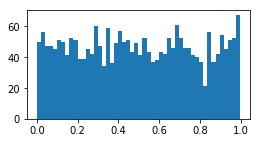

[ 50.  56.  47.  47.  45.  51.  50.  41.  52.  51.  39.  39.  45.  42.  60.
  47.  34.  59.  36.  49.  57.  50.  51.  43.  49.  41.  52.  43.  37.  38.
  43.  42.  52.  46.  61.  52.  46.  46.  41.  40.  37.  21.  56.  37.  42.
  54.  45.  51.  52.  67.] [  5.38743213e-04   2.04631508e-02   4.03875584e-02   6.03119660e-02
   8.02363736e-02   1.00160781e-01   1.20085189e-01   1.40009596e-01
   1.59934004e-01   1.79858412e-01   1.99782819e-01   2.19707227e-01
   2.39631634e-01   2.59556042e-01   2.79480450e-01   2.99404857e-01
   3.19329265e-01   3.39253672e-01   3.59178080e-01   3.79102487e-01
   3.99026895e-01   4.18951303e-01   4.38875710e-01   4.58800118e-01
   4.78724525e-01   4.98648933e-01   5.18573341e-01   5.38497748e-01
   5.58422156e-01   5.78346563e-01   5.98270971e-01   6.18195379e-01
   6.38119786e-01   6.58044194e-01   6.77968601e-01   6.97893009e-01
   7.17817417e-01   7.37741824e-01   7.57666232e-01   7.77590639e-01
   7.97515047e-01   8.17439455e-01   8.37363862e-01   8

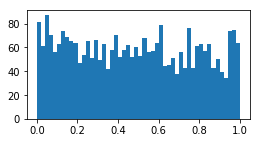

[ 81.  61.  87.  70.  56.  63.  74.  69.  65.  64.  47.  54.  65.  51.  66.
  49.  63.  42.  58.  70.  52.  58.  62.  52.  60.  53.  68.  56.  57.  64.
  79.  44.  45.  51.  38.  56.  43.  76.  43.  61.  63.  57.  63.  43.  50.
  39.  34.  74.  75.  64.] [  6.08321095e-04   2.05944342e-02   4.05805472e-02   6.05666603e-02
   8.05527734e-02   1.00538886e-01   1.20525000e-01   1.40511113e-01
   1.60497226e-01   1.80483339e-01   2.00469452e-01   2.20455565e-01
   2.40441678e-01   2.60427791e-01   2.80413904e-01   3.00400017e-01
   3.20386130e-01   3.40372243e-01   3.60358356e-01   3.80344470e-01
   4.00330583e-01   4.20316696e-01   4.40302809e-01   4.60288922e-01
   4.80275035e-01   5.00261148e-01   5.20247261e-01   5.40233374e-01
   5.60219487e-01   5.80205600e-01   6.00191713e-01   6.20177826e-01
   6.40163939e-01   6.60150053e-01   6.80136166e-01   7.00122279e-01
   7.20108392e-01   7.40094505e-01   7.60080618e-01   7.80066731e-01
   8.00052844e-01   8.20038957e-01   8.40025070e-01   8

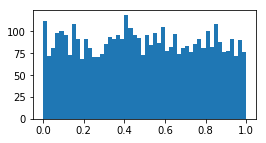

[ 111.   72.   81.   98.  100.   95.   73.  108.   91.   68.   91.   81.
   70.   70.   74.   85.   93.   91.   96.   91.  118.  103.   96.   92.
   73.   96.   84.   98.   86.  105.   77.   82.   97.   74.   81.   83.
   76.   85.   91.   81.  100.   82.  108.   88.   76.   77.   91.   71.
   90.   76.] [  3.80966540e-04   2.03724180e-02   4.03638695e-02   6.03553210e-02
   8.03467725e-02   1.00338224e-01   1.20329675e-01   1.40321127e-01
   1.60312578e-01   1.80304030e-01   2.00295481e-01   2.20286933e-01
   2.40278384e-01   2.60269836e-01   2.80261287e-01   3.00252739e-01
   3.20244190e-01   3.40235642e-01   3.60227093e-01   3.80218545e-01
   4.00209996e-01   4.20201448e-01   4.40192899e-01   4.60184351e-01
   4.80175802e-01   5.00167254e-01   5.20158705e-01   5.40150157e-01
   5.60141608e-01   5.80133060e-01   6.00124511e-01   6.20115962e-01
   6.40107414e-01   6.60098865e-01   6.80090317e-01   7.00081768e-01
   7.20073220e-01   7.40064671e-01   7.60056123e-01   7.80047574e-01
   8

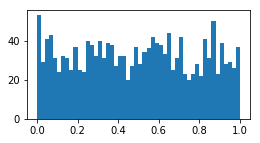

[ 53.  29.  41.  43.  31.  24.  32.  31.  25.  37.  25.  24.  40.  38.  32.
  40.  31.  39.  38.  27.  32.  32.  20.  27.  37.  28.  34.  36.  42.  39.
  38.  33.  44.  25.  31.  42.  23.  20.  23.  28.  22.  41.  31.  50.  23.
  39.  28.  29.  26.  37.] [  2.25863646e-05   2.00198760e-02   4.00171656e-02   6.00144553e-02
   8.00117449e-02   1.00009035e-01   1.20006324e-01   1.40003614e-01
   1.60000903e-01   1.79998193e-01   1.99995483e-01   2.19992772e-01
   2.39990062e-01   2.59987352e-01   2.79984641e-01   2.99981931e-01
   3.19979221e-01   3.39976510e-01   3.59973800e-01   3.79971089e-01
   3.99968379e-01   4.19965669e-01   4.39962958e-01   4.59960248e-01
   4.79957538e-01   4.99954827e-01   5.19952117e-01   5.39949407e-01
   5.59946696e-01   5.79943986e-01   5.99941275e-01   6.19938565e-01
   6.39935855e-01   6.59933144e-01   6.79930434e-01   6.99927724e-01
   7.19925013e-01   7.39922303e-01   7.59919593e-01   7.79916882e-01
   7.99914172e-01   8.19911461e-01   8.39908751e-01   8

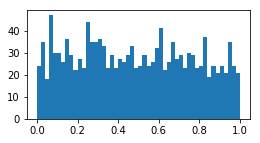

[ 24.  35.  18.  47.  30.  30.  26.  36.  29.  22.  27.  23.  44.  35.  35.
  36.  33.  23.  29.  23.  27.  26.  29.  33.  23.  24.  29.  24.  26.  32.
  41.  22.  26.  35.  27.  29.  23.  30.  29.  23.  24.  37.  19.  24.  21.
  24.  21.  35.  24.  21.] [  3.14850446e-04   2.03069209e-02   4.02989913e-02   6.02910617e-02
   8.02831322e-02   1.00275203e-01   1.20267273e-01   1.40259343e-01
   1.60251414e-01   1.80243484e-01   2.00235555e-01   2.20227625e-01
   2.40219696e-01   2.60211766e-01   2.80203837e-01   3.00195907e-01
   3.20187977e-01   3.40180048e-01   3.60172118e-01   3.80164189e-01
   4.00156259e-01   4.20148330e-01   4.40140400e-01   4.60132470e-01
   4.80124541e-01   5.00116611e-01   5.20108682e-01   5.40100752e-01
   5.60092823e-01   5.80084893e-01   6.00076963e-01   6.20069034e-01
   6.40061104e-01   6.60053175e-01   6.80045245e-01   7.00037316e-01
   7.20029386e-01   7.40021456e-01   7.60013527e-01   7.80005597e-01
   7.99997668e-01   8.19989738e-01   8.39981809e-01   8

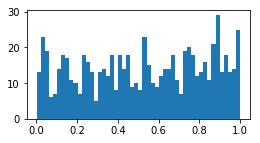

[ 13.  23.  19.   6.   7.  14.  18.  17.  11.  10.   7.  18.  16.  13.   5.
  13.  14.  12.  18.   8.  18.  14.  18.   9.  10.   8.  23.  15.  10.   9.
  12.  14.  14.  18.  11.   7.  19.  20.  18.  12.  13.  16.  11.  21.  29.
  13.  18.  13.  14.  25.] [ 0.00256818  0.02248636  0.04240455  0.06232273  0.08224091  0.10215909
  0.12207727  0.14199545  0.16191364  0.18183182  0.20175     0.22166818
  0.24158636  0.26150455  0.28142273  0.30134091  0.32125909  0.34117727
  0.36109545  0.38101364  0.40093182  0.42085     0.44076818  0.46068636
  0.48060455  0.50052273  0.52044091  0.54035909  0.56027727  0.58019545
  0.60011364  0.62003182  0.63995     0.65986818  0.67978636  0.69970455
  0.71962273  0.73954091  0.75945909  0.77937727  0.79929545  0.81921364
  0.83913182  0.85905     0.87896818  0.89888636  0.91880455  0.93872273
  0.95864091  0.97855909  0.99847727] <a list of 50 Patch objects>
The deadly truth 1941


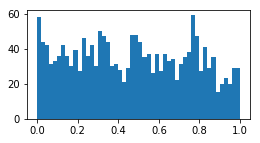

[ 58.  44.  42.  31.  33.  36.  42.  36.  30.  39.  27.  46.  36.  42.  30.
  50.  47.  44.  30.  31.  28.  21.  29.  48.  48.  44.  35.  37.  26.  37.
  27.  37.  33.  34.  22.  31.  35.  38.  59.  47.  27.  41.  29.  35.  15.
  20.  23.  20.  29.  29.] [  2.35481888e-04   2.02072241e-02   4.01789662e-02   6.01507084e-02
   8.01224506e-02   1.00094193e-01   1.20065935e-01   1.40037677e-01
   1.60009419e-01   1.79981161e-01   1.99952904e-01   2.19924646e-01
   2.39896388e-01   2.59868130e-01   2.79839872e-01   2.99811614e-01
   3.19783357e-01   3.39755099e-01   3.59726841e-01   3.79698583e-01
   3.99670325e-01   4.19642068e-01   4.39613810e-01   4.59585552e-01
   4.79557294e-01   4.99529036e-01   5.19500778e-01   5.39472521e-01
   5.59444263e-01   5.79416005e-01   5.99387747e-01   6.19359489e-01
   6.39331231e-01   6.59302974e-01   6.79274716e-01   6.99246458e-01
   7.19218200e-01   7.39189942e-01   7.59161684e-01   7.79133427e-01
   7.99105169e-01   8.19076911e-01   8.39048653e-01   8

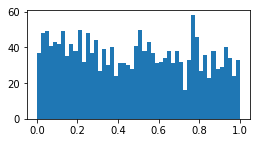

[ 37.  48.  49.  41.  43.  42.  49.  35.  42.  38.  50.  32.  48.  37.  44.
  27.  39.  30.  40.  24.  31.  31.  30.  28.  41.  50.  38.  43.  37.  31.
  32.  34.  38.  31.  38.  32.  16.  33.  58.  46.  27.  36.  23.  38.  28.
  29.  40.  34.  24.  33.] [  6.61450851e-04   2.06395403e-02   4.06176297e-02   6.05957192e-02
   8.05738086e-02   1.00551898e-01   1.20529987e-01   1.40508077e-01
   1.60486166e-01   1.80464256e-01   2.00442345e-01   2.20420435e-01
   2.40398524e-01   2.60376614e-01   2.80354703e-01   3.00332792e-01
   3.20310882e-01   3.40288971e-01   3.60267061e-01   3.80245150e-01
   4.00223240e-01   4.20201329e-01   4.40179419e-01   4.60157508e-01
   4.80135597e-01   5.00113687e-01   5.20091776e-01   5.40069866e-01
   5.60047955e-01   5.80026045e-01   6.00004134e-01   6.19982224e-01
   6.39960313e-01   6.59938402e-01   6.79916492e-01   6.99894581e-01
   7.19872671e-01   7.39850760e-01   7.59828850e-01   7.79806939e-01
   7.99785028e-01   8.19763118e-01   8.39741207e-01   8

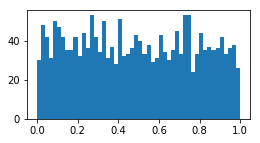

[ 30.  48.  42.  31.  50.  47.  42.  35.  35.  42.  32.  44.  36.  53.  42.
  34.  50.  31.  37.  28.  51.  32.  33.  36.  43.  40.  33.  38.  29.  31.
  43.  34.  30.  35.  45.  33.  53.  53.  24.  33.  44.  35.  37.  35.  36.
  42.  33.  36.  38.  26.] [  8.09176056e-05   2.00511804e-02   4.00214432e-02   5.99917059e-02
   7.99619687e-02   9.99322315e-02   1.19902494e-01   1.39872757e-01
   1.59843020e-01   1.79813283e-01   1.99783545e-01   2.19753808e-01
   2.39724071e-01   2.59694334e-01   2.79664597e-01   2.99634859e-01
   3.19605122e-01   3.39575385e-01   3.59545648e-01   3.79515910e-01
   3.99486173e-01   4.19456436e-01   4.39426699e-01   4.59396962e-01
   4.79367224e-01   4.99337487e-01   5.19307750e-01   5.39278013e-01
   5.59248275e-01   5.79218538e-01   5.99188801e-01   6.19159064e-01
   6.39129327e-01   6.59099589e-01   6.79069852e-01   6.99040115e-01
   7.19010378e-01   7.38980640e-01   7.58950903e-01   7.78921166e-01
   7.98891429e-01   8.18861692e-01   8.38831954e-01   8

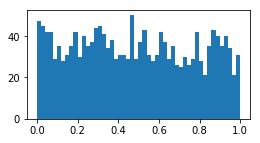

[ 47.  45.  42.  42.  29.  35.  28.  31.  35.  42.  30.  40.  35.  37.  44.
  45.  41.  34.  38.  29.  31.  31.  29.  50.  29.  37.  43.  31.  28.  31.
  42.  37.  29.  35.  26.  25.  30.  26.  29.  42.  28.  21.  35.  43.  40.
  35.  40.  34.  21.  31.] [  3.92428741e-05   2.00044475e-02   3.99696522e-02   5.99348568e-02
   7.99000615e-02   9.98652661e-02   1.19830471e-01   1.39795675e-01
   1.59760880e-01   1.79726085e-01   1.99691289e-01   2.19656494e-01
   2.39621699e-01   2.59586903e-01   2.79552108e-01   2.99517313e-01
   3.19482517e-01   3.39447722e-01   3.59412927e-01   3.79378131e-01
   3.99343336e-01   4.19308541e-01   4.39273745e-01   4.59238950e-01
   4.79204155e-01   4.99169359e-01   5.19134564e-01   5.39099768e-01
   5.59064973e-01   5.79030178e-01   5.98995382e-01   6.18960587e-01
   6.38925792e-01   6.58890996e-01   6.78856201e-01   6.98821406e-01
   7.18786610e-01   7.38751815e-01   7.58717020e-01   7.78682224e-01
   7.98647429e-01   8.18612634e-01   8.38577838e-01   8

In [41]:
from itertools import islice

for text in islice(ds.texts(), 10):
    plot_histogram(text)

In [18]:
bins

array([  6.61450851e-04,   1.06504956e-02,   2.06395403e-02,
         3.06285850e-02,   4.06176297e-02,   5.06066745e-02,
         6.05957192e-02,   7.05847639e-02,   8.05738086e-02,
         9.05628533e-02,   1.00551898e-01,   1.10540943e-01,
         1.20529987e-01,   1.30519032e-01,   1.40508077e-01,
         1.50497122e-01,   1.60486166e-01,   1.70475211e-01,
         1.80464256e-01,   1.90453301e-01,   2.00442345e-01,
         2.10431390e-01,   2.20420435e-01,   2.30409479e-01,
         2.40398524e-01,   2.50387569e-01,   2.60376614e-01,
         2.70365658e-01,   2.80354703e-01,   2.90343748e-01,
         3.00332792e-01,   3.10321837e-01,   3.20310882e-01,
         3.30299927e-01,   3.40288971e-01,   3.50278016e-01,
         3.60267061e-01,   3.70256106e-01,   3.80245150e-01,
         3.90234195e-01,   4.00223240e-01,   4.10212284e-01,
         4.20201329e-01,   4.30190374e-01,   4.40179419e-01,
         4.50168463e-01,   4.60157508e-01,   4.70146553e-01,
         4.80135597e-01,